In [1]:
import numpy as np
import pandas as pd
from nptdms import TdmsFile as td
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft,fftshift
%matplotlib inline
%config InlineBackend.figure_format = 'svg'#将图片保存为矢量图

import matplotlib
del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()

plt.rcParams['font.sans-serif']=['Simsun'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

In [2]:
path = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/论文绘图/'

In [3]:
df = pd.read_excel(path+'传感器数量对准确率的影响.xlsx',index_col=0,encoding="gbk")

In [4]:
df

,train,valid,test
组合,,,
NI_2,0.803900,0.398600,0.39390
NI_3,0.731100,0.225200,0.22450
NI_4,0.869000,0.757900,0.70860
NI_5,0.803300,0.474600,0.37000
NI_6,0.805400,0.583100,0.49540
NI_23,0.873600,0.681000,0.63610
NI_24,0.987700,0.705600,0.65470
NI_25,0.735200,0.384600,0.38340
NI_26,0.755800,0.360900,0.35890


In [5]:
colors=['#845ec2','#d65db1','#ff6f91','#ff9671','#ffc75f','#f9f871']

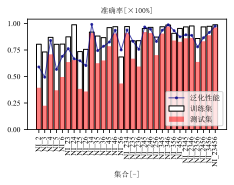

In [8]:
plt.figure(figsize=(3.3,2.7))
# plt.plot(df['train'],'--',color = '#4f81bd',marker = 'o',markersize = 2 ,linewidth = 1,label=('训练集'))
# plt.plot(df['test'],color ='r' ,marker='o',markersize = 2,alpha = 1,linewidth = 1,label=('测试集'))
plt.plot(1-df['train']+df['test'],color = '#00008B' ,marker='o',markersize = 2,alpha = 0.7,linewidth = 1,label=('泛化性能'))
plt.bar(df.index,df['train'],color = 'white',edgecolor='black',label = ('训练集'))
plt.bar(df.index,df['test'],color ='r',alpha=0.5,label = ('测试集'))
plt.xticks(fontproperties = 'Times New Roman', size = 7.5,rotation=90)
plt.yticks(fontproperties = 'Times New Roman', size = 7.5,)
plt.xlabel('集合[-]',size = 7.5)
plt.title('准确率[×100%]',size = 7.5)
plt.legend(prop={ 'size'   : 7.5},loc = 'lower right')
# plt.savefig('C:\\Users\\shamrockyj\\Desktop\\loss.png', dpi=500, bbox_inches='tight') 
plt.tight_layout()
plt.savefig(path+'传感器对比1.png', dpi=300, bbox_inches='tight') 

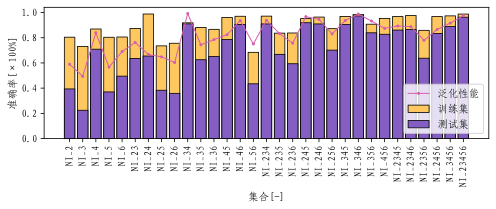

In [13]:
plt.figure(figsize=(7,3))
# plt.plot(df['train'],'--',color = '#4f81bd',marker = 'o',markersize = 2 ,linewidth = 1,label=('训练集'))
# plt.plot(df['test'],color ='r' ,marker='o',markersize = 2,alpha = 1,linewidth = 1,label=('测试集'))
plt.plot(1-df['train']+df['test'],color = colors[1] ,marker='o',markersize = 2,linewidth = 1,label=('泛化性能'))
plt.bar(df.index,df['train'],color = colors[4],edgecolor='black',linewidth = 0.8,label = ('训练集'))
plt.bar(df.index,df['test'],color =colors[0],edgecolor='black',linewidth = 0.8,label = ('测试集'))
plt.xticks(size = 10.5,rotation=90)
plt.yticks( size = 10.5,)
plt.xlabel('集合[-]',size = 10.5)
plt.ylabel('准确率[×100%]',size = 10.5)
plt.legend(prop={ 'size'   : 10.5},loc = 'lower right')
# plt.savefig('C:\\Users\\shamrockyj\\Desktop\\loss.png', dpi=500, bbox_inches='tight') 
plt.tight_layout()
# plt.savefig(path+'传感器对比.png', dpi=300, bbox_inches='tight') 